In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
zero_one_colourmap = ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 7
np.random.seed(800)

# Generate Data

In [4]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# its a bnarry classificaiton problem with 2 imput features

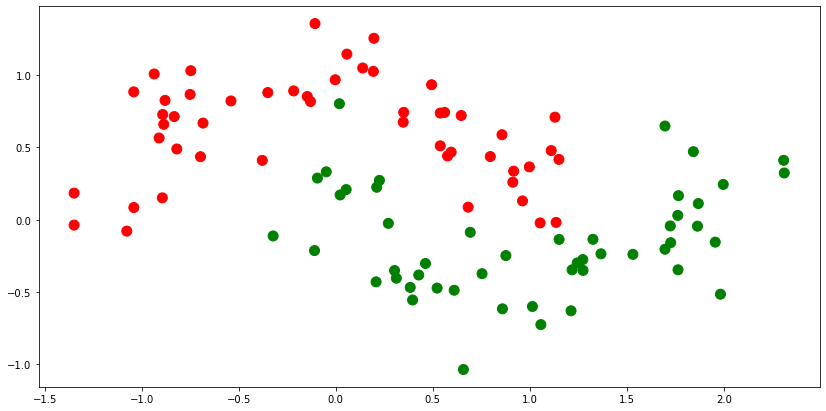

In [5]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Overfit Model

In [7]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=4000, verbose=0)

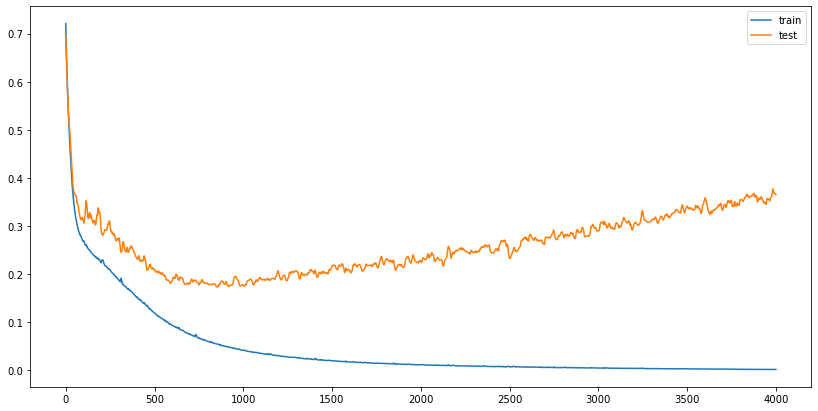

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

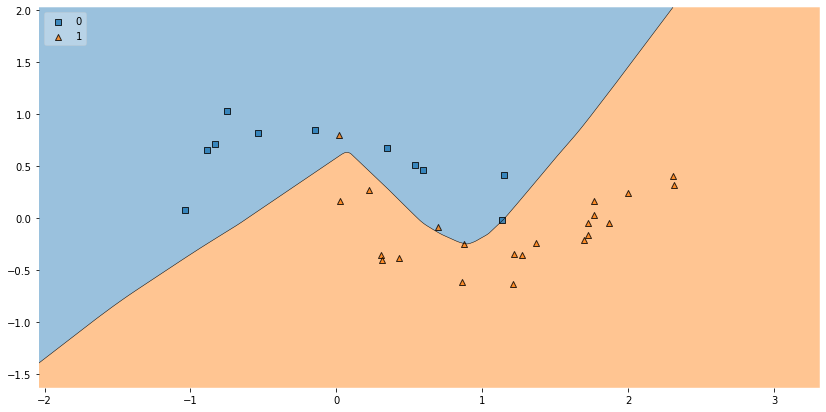

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping Model

In [11]:
reg_model = Sequential()
reg_model.add(Dense(128, input_dim=2, activation='relu'))
reg_model.add(Dense(1, activation='sigmoid'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [12]:
# Early stopping is a model we can stop trainging at a point where loss increases, we can stop the epochs,
# Hence restritig overfitting

reg_history = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=4000, 
                            callbacks=EarlyStopping(monitor='val_loss'))

# We can the model stopped at 45 the epoch and stops the ttraining

Epoch 1/4000
3/3 [==============================] - 0s 55ms/step - loss: 0.6987 - accuracy: 0.4328 - val_loss: 0.6949 - val_accuracy: 0.4848
Epoch 2/4000
3/3 [==============================] - 0s 10ms/step - loss: 0.6812 - accuracy: 0.7164 - val_loss: 0.6807 - val_accuracy: 0.6970
Epoch 3/4000
3/3 [==============================] - 0s 14ms/step - loss: 0.6654 - accuracy: 0.8806 - val_loss: 0.6668 - val_accuracy: 0.7576
Epoch 4/4000
3/3 [==============================] - 0s 9ms/step - loss: 0.6511 - accuracy: 0.8806 - val_loss: 0.6577 - val_accuracy: 0.7576
Epoch 5/4000
3/3 [==============================] - 0s 8ms/step - loss: 0.6381 - accuracy: 0.8806 - val_loss: 0.6488 - val_accuracy: 0.7576
Epoch 6/4000
3/3 [==============================] - 0s 7ms/step - loss: 0.6253 - accuracy: 0.8806 - val_loss: 0.6364 - val_accuracy: 0.8485
Epoch 7/4000
3/3 [==============================] - 0s 10ms/step - loss: 0.6127 - accuracy: 0.8657 - val_loss: 0.6244 - val_accuracy: 0.8788
Epoch 8/4000
3/3

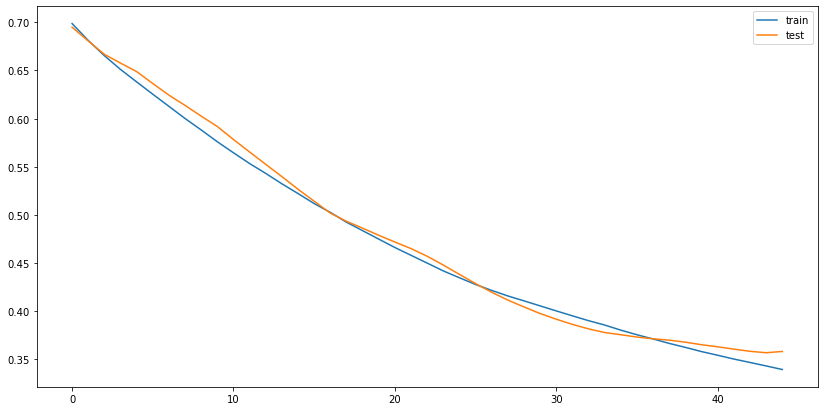

In [14]:
plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.show()

## We see till 45th epoc losses we decreasing, and keras foudn that after 45th epochs, losses starts increasing. Hence stoppend the iterations.\


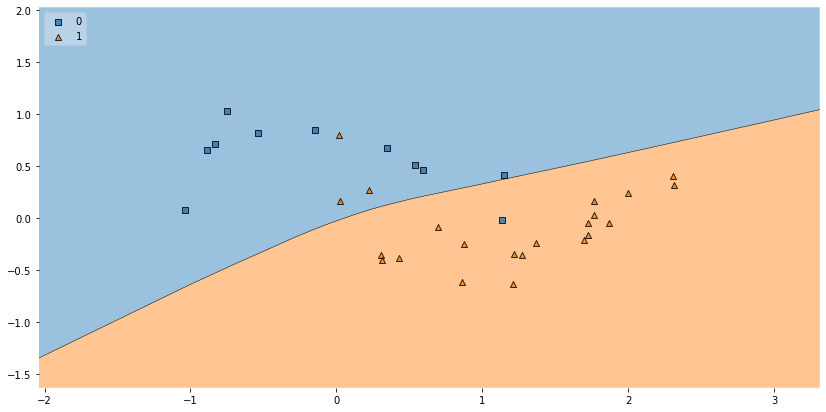

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = reg_model, legend=2)
plt.show()